In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import numpy as np

### Data Upload

In [21]:
data = pd.read_csv('Stockprice.csv')
data.head(10)

,Company,Date,StockPrice,Revenue
0,Luckin Coffee,0,37.12,1.00
1,Luckin Coffee,0,39.61,1.00
2,Luckin Coffee,0,37.87,1.00
3,Luckin Coffee,1,36.40,1.00
4,Luckin Coffee,1,32.49,1.00
5,Luckin Coffee,1,31.35,1.00
6,Luckin Coffee,1,36.24,1.00
7,Alibaba,0,205.47,0.94
8,Alibaba,0,210.23,0.94
9,Alibaba,0,212.02,0.94


### Creating Treatment and Pre_post variable

In [22]:
data['ActualDate'] = np.tile(np.arange(7),31)
data['Treatment'] = np.where(data['Revenue'] > 0.25,1, 0)
data['Treatment'].value_counts()
data.head()

,Company,Date,StockPrice,Revenue,ActualDate,Treatment
0,Luckin Coffee,0,37.12,1.0,0,1
1,Luckin Coffee,0,39.61,1.0,1,1
2,Luckin Coffee,0,37.87,1.0,2,1
3,Luckin Coffee,1,36.40,1.0,3,1
4,Luckin Coffee,1,32.49,1.0,4,1


In [23]:
data['Treatment_Groups'] = np.where(data['Treatment'] == 1,"% Revenue > 25%", "% Revenue < 25%")
data_pre = data[data.Date==0]
data_post = data[data.Date==1]

### Comparing Parallel Trends

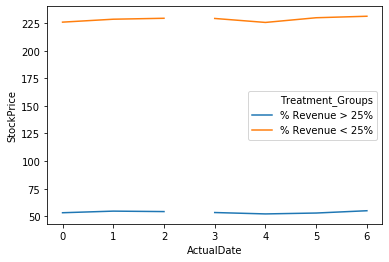

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
plot_2007_2009 = sns.lineplot(x="ActualDate", y="StockPrice", data=data_pre,hue='Treatment_Groups',ci=None)
plot_2016_2018 = sns.lineplot(x="ActualDate", y="StockPrice", data=data_post,hue='Treatment_Groups',ci=None, legend=False)

### Panel OLS

Difference-in-Difference Model

In [25]:
from linearmodels import PanelOLS
df = data.set_index(['Company','ActualDate'])
model=PanelOLS.from_formula('StockPrice~Revenue*Date+EntityEffects',data=df, drop_absorbed=True)
model.fit(cov_type='clustered', cluster_entity=True)

C:\Users\abhis\AppData\Roaming\Python\Python37\site-packages\linearmodels\panel\model.py:1669: AbsorbingEffectWarning: 
Variables have been fully absorbed and have removed from the regression:

Revenue

  AbsorbingEffectWarning,


Dep. Variable:,StockPrice,R-squared:,0.0123
Estimator:,PanelOLS,R-squared (Between):,0.0017
No. Observations:,217,R-squared (Within):,0.0123
Date:,"Wed, Apr 22 2020",R-squared (Overall):,0.0017
Time:,10:40:27,Log-likelihood,-621.93
Cov. Estimator:,Clustered,,
,,F-statistic:,1.1494
Entities:,31,P-value,0.3191
Avg Obs:,7.0000,Distribution:,"F(2,184)"
Min Obs:,7.0000,,
Max Obs:,7.0000,F-statistic (robust):,0.9586


## EXTRA 

In [166]:
import statsmodels.formula.api as smf
# df_append = df_2016_2018.append(df_2007_2009)
# df_append['post_2010']=df_append['YEAR'].apply(lambda x : 1 if x >= 2016 else 0)
model = smf.ols('StockPrice~Treatment*Date+C(Company)', data).fit()
model.get_robustcov_results(cov_type = 'cluster', groups = data['Company']).summary()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:1752: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 33, but rank is 2
  'rank is %d' % (J, J_), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             StockPrice   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                     5572.
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           2.72e-39
Time:                        20:33:07   Log-Likelihood:                -622.01
No. Observations:                 217   AIC:                             1310.
Df Residuals:                     184   BIC:                             1422.
Df Model:                          32                                         
Covariance Type:              cluster                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                             209.4172      0.606    345.510      0.000     208.179     210.655
C(Company)[T.Alibaba]                 162.6171   4.39e-13    3.7e+14      0.000     162.617     162.617
C(Company)[T.Alphabet]               1240.5506      0.063   1.97e+04      0.000    1240.422    1240.679
C(Company)[T.Apple]                   105.9649      0.063   1685.120      0.000     105.836     106.093
C(Company)[T.Bank of China]           -48.2563   1.82e-14  -2.66e+15      0.000     -48.256     -48.256
C(Company)[T.Boeing]                  108.6535      0.063   1727.875      0.000     108.525     108.782
C(Company)[T.China Eastern Airline]   -25.6343    2.7e-14  -9.48e+14      0.000     -25.634     -25.634
C(Company)[T.China Mengniu Diary]      -8.8543   1.52e-13  -5.84e+13      0.000      -8.854      -8.854
C(Company)[T.Coca Cola]              -151.9908      0.063  -2417.053      0.000    -152.119    -151.862
C(Company)[T.Delta Airlines]         -153.1922      0.063  -2436.158      0.000    -153.321    -153.064
C(Company)[T.Disney]                  -71.0880      0.063  -1130.485      0.000     -71.216     -70.960
C(Company)[T.Estee Lauder]            -12.4051      0.063   -197.274      0.000     -12.534     -12.277
C(Company)[T.Facebook]                  1.6049      0.063     25.522      0.000       1.476       1.733
C(Company)[T.General Electric]       -197.7122      0.063  -3144.143      0.000    -197.841    -197.584
C(Company)[T.General Motors]          -15.0129    9.2e-14  -1.63e+14      0.000     -15.013     -15.013
C(Company)[T.Hyatt]                  -124.5665      0.063  -1980.934      0.000    -124.695    -124.438
C(Company)[T.IBM]                     -68.3394      0.063  -1086.775      0.000     -68.468     -68.211
C(Company)[T.Intel]                    17.0086   6.17e-14   2.76e+14      0.000      17.009      17.009
C(Company)[T.Lenovo]                  -47.9640   7.75e-14  -6.19e+14      0.000     -47.964     -47.964
C(Company)[T.Luckin Coffee]           -12.7814   2.49e-14  -5.14e+14      0.000     -12.781     -12.781
C(Company)[T.McDonald]                  3.4292      0.063     54.533      0.000       3.301       3.558
C(Company)[T.Microsoft]               -39.5465      0.063   -628.893      0.000     -39.675     -39.418
C(Company)[T.NIKE]                   -110.6408      0.063  -1759.479      0.000    -110.769    -110.512
C(Company)[T.Netflix]                 140.6120      0.063   2236.100      0.000     140.484     140.740
C(Company)[T.Nvidia]                   33.3278      0.063    529.999      0.000      33.199      33.456
C(Company)[T.P&G]                     -84.6222      0.063  -1345.716      0.000     -84.751     -84.494
C(Company)[T.Qualcomm]                 38.9114   2.09e-13   1.87e+1